In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import seaborn as sns
import warnings
%matplotlib inline

# Challenge 1

In [196]:
movies_info = pd.read_csv('2013_movies.csv', header = 0)

In [197]:
movies_info

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


In [198]:
movies_info['DomesticTotalGross'] = movies_info['DomesticTotalGross'].apply(np.int64)
movies_info.set_index('ReleaseDate', inplace = True)
movies_info.sort_index(inplace = True)

# Challenge 2

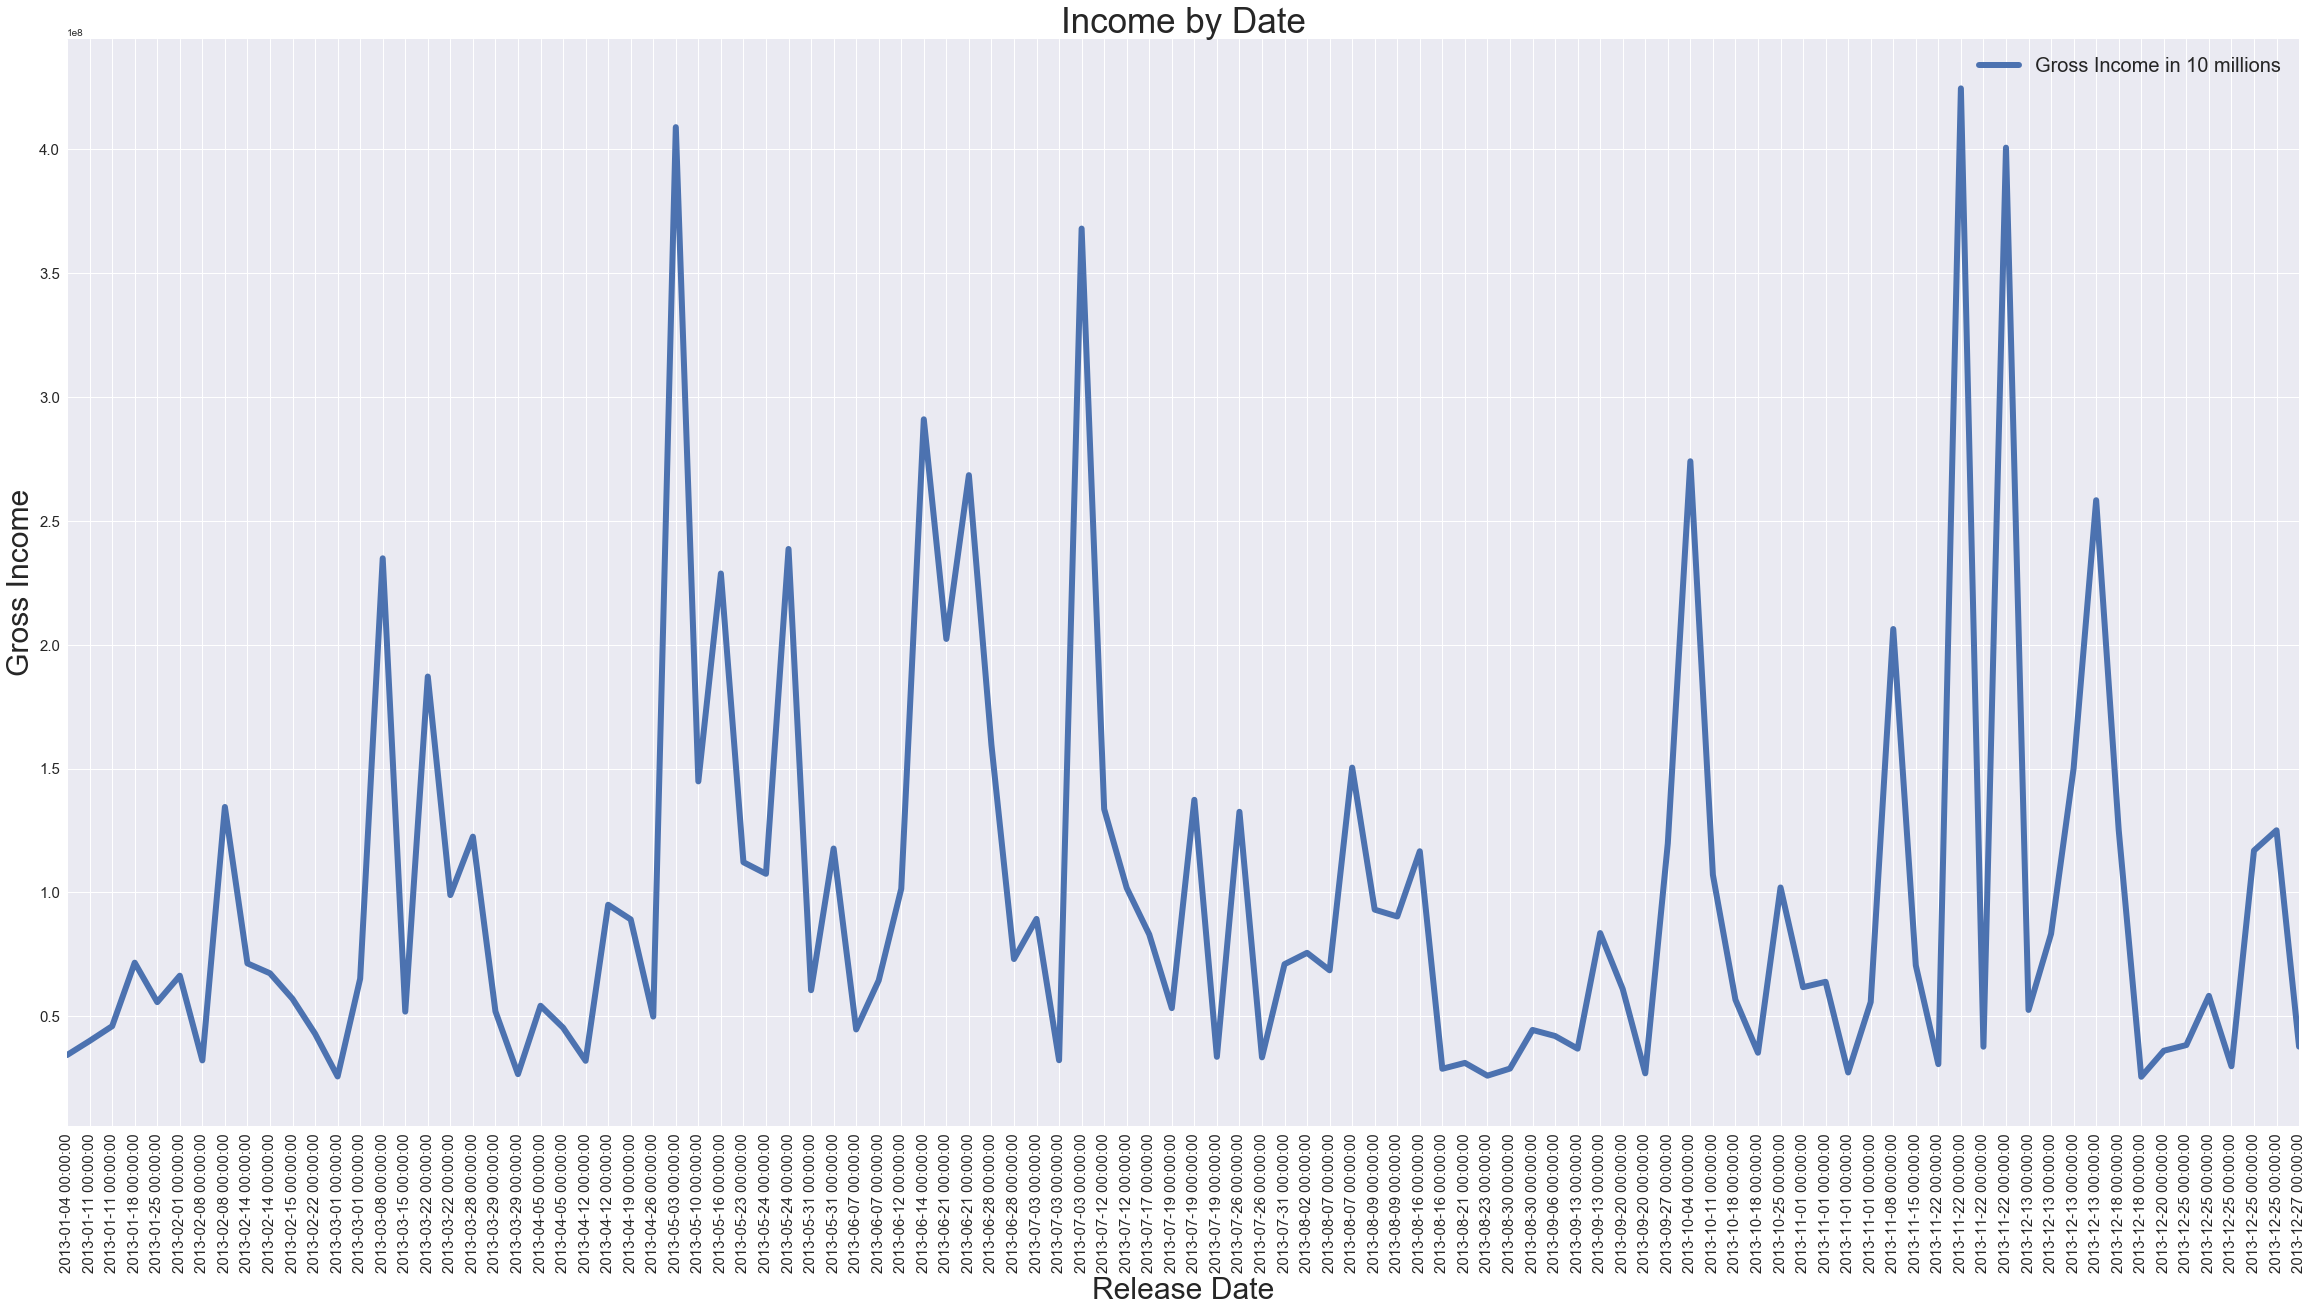

In [199]:
plt.figure(figsize=(40,20));
movies_info['DomesticTotalGross'].plot(fontsize = 15, linewidth = 6, label = "Gross Income in 10 millions");
plt.xlabel('Release Date', fontsize = 30)
plt.ylabel('Gross Income', fontsize = 30)
plt.title('Income by Date', fontsize = 35)
plt.legend(fontsize = 20)
plt.xticks([x for x in range(len(movies_info.index.values))],[str(x) for x in movies_info.index.values],rotation=90);
plt.show();

# Challenge 3

In [200]:
movies_info_R = movies_info[['DomesticTotalGross','Runtime','Rating']].groupby(['Rating']).mean()
movies_info_R

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


# Challenge 4

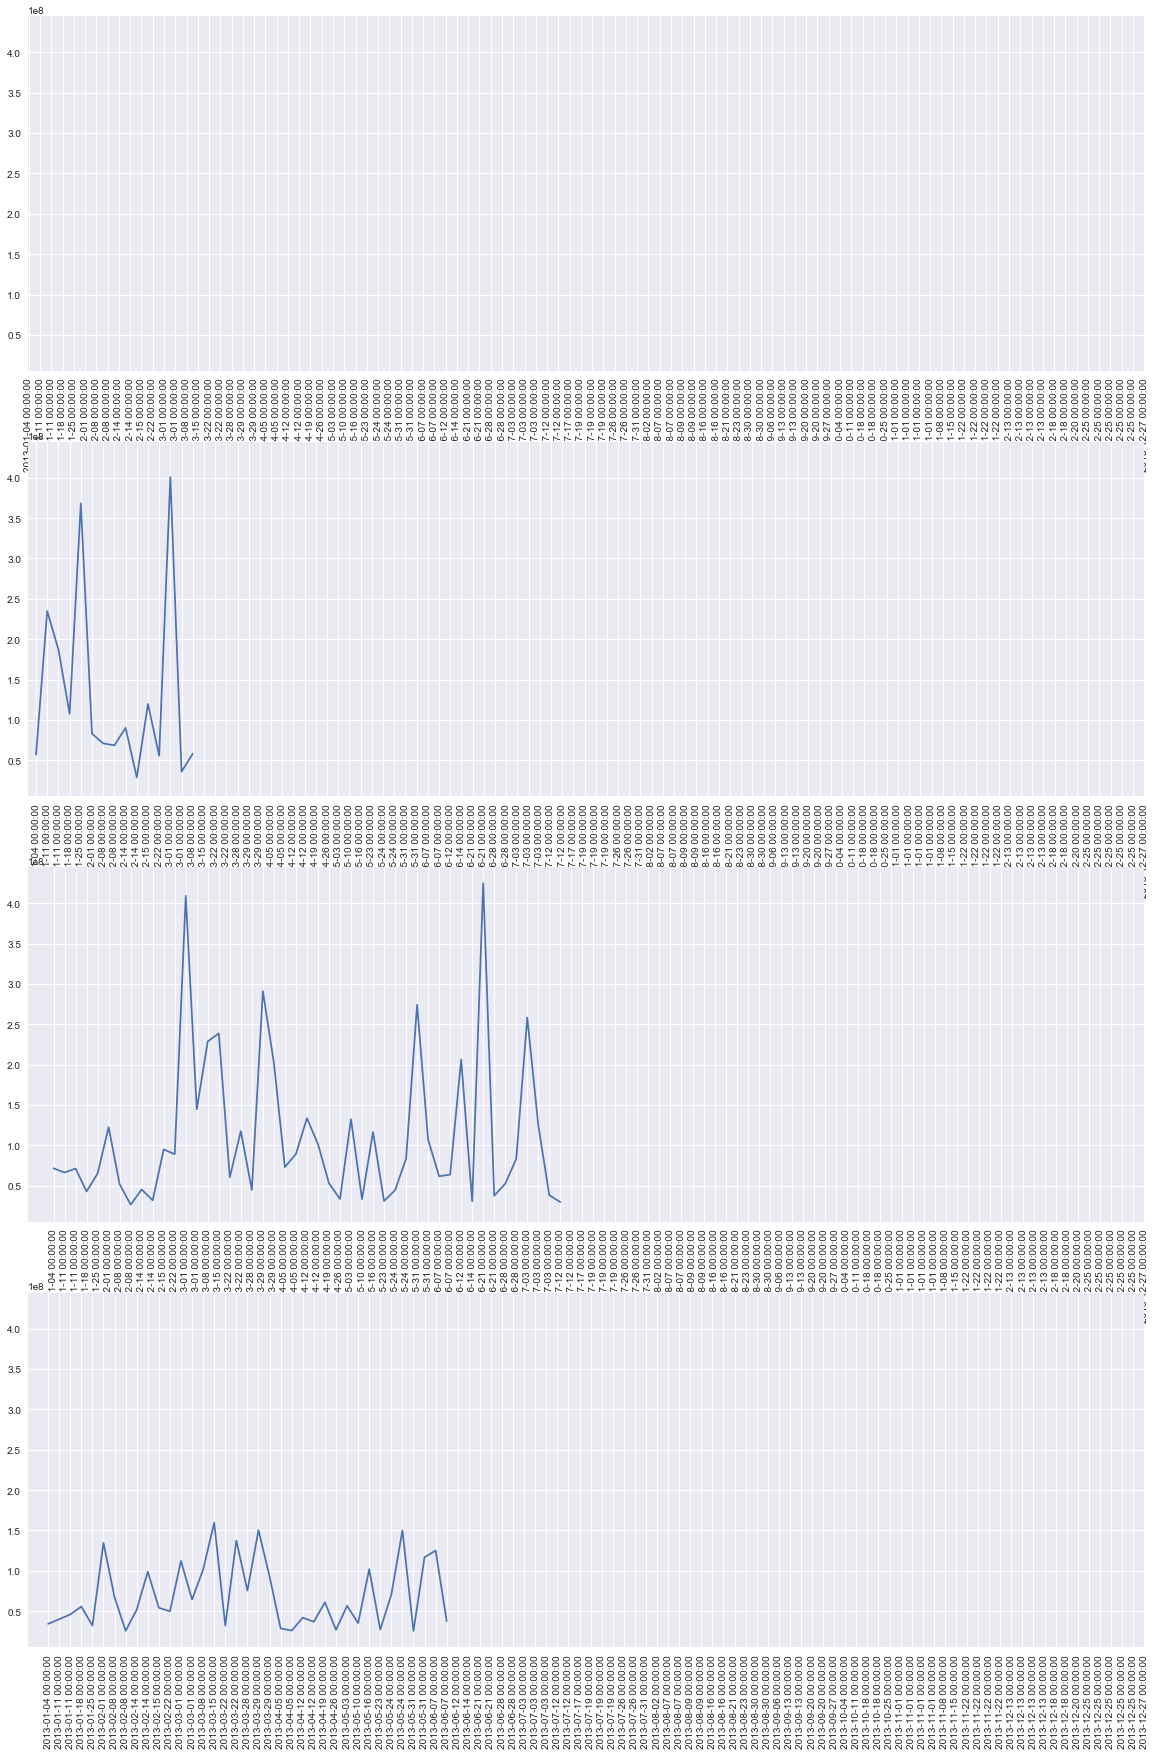

In [201]:
G = movies_info[movies_info['Rating'] == 'G']
PG = movies_info[movies_info['Rating'] == 'PG']
PG_13 = movies_info[movies_info['Rating'] == 'PG-13']
R = movies_info[movies_info['Rating'] == 'R']

f, ax = plt.subplots(4, 1, sharey=True, sharex= False, figsize = (20,30));

ax[0].plot(range(len(G.index)), G['DomesticTotalGross']);
ax[0].set_xticks([x for x in range(len(movies_info.index.values))]);
ax[0].set_xticklabels([str(x) for x in movies_info.index.values],rotation=90);
ax[1].plot(range(len(PG.index)), PG['DomesticTotalGross']);
ax[1].set_xticks([x for x in range(len(movies_info.index.values))]);
ax[1].set_xticklabels([str(x) for x in movies_info.index.values],rotation=90);
ax[2].plot(range(len(PG_13.index)), PG_13['DomesticTotalGross']);
ax[2].set_xticks([x for x in range(len(movies_info.index.values))]);
ax[2].set_xticklabels([str(x) for x in movies_info.index.values],rotation=90);
ax[3].plot(range(len(R.index)), R['DomesticTotalGross']);
ax[3].set_xticks([x for x in range(len(movies_info.index.values))]);
ax[3].set_xticklabels([str(x) for x in movies_info.index.values],rotation=90);

# Challenge 5

In [202]:
movies_info[['DomesticTotalGross','Director']].groupby(['Director']).sum().idxmax()

DomesticTotalGross    Francis Lawrence
dtype: object

In [203]:
movies_info.index = pd.to_datetime(movies_info.index)
movies_info.index = movies_info.index.strftime('%m')

In [204]:
movies_info_M = movies_info['DomesticTotalGross'].groupby(movies_info.index).mean()

# Challenge 6

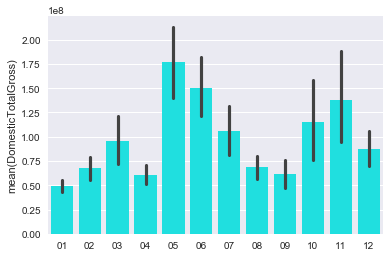

In [209]:
movies_mean = sns.barplot(movies_info.index, movies_info.DomesticTotalGross, ci=68, color='cyan');